<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Old" data-toc-modified-id="Old-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Old</a></span></li></ul></div>

In [1]:
#%load_ext autoreload
#%autoreload 2
#%matplotlib inline

In [1]:
from importlib import reload
import models; reload(models)
from models.GAN import GAN
from models.models import *
from models.train import *
from models.utils import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from glob import glob

Using TensorFlow backend.


In [2]:
limit_mem()

In [3]:
mnist_gan = GAN(exp_id='mnist_w', wasserstein=True, verbose=0)

In [4]:
mnist_gan.load_data('mnist')

Train samples: 60000 Test samples: 10000


In [5]:
mnist_gan.create_generator(filters=[128, 64], first_conv_size=7, activation='LeakyReLU',
                           bn=True)

/home/s/S.Rasp/.conda/envs/cbrain_gpu/lib/python3.6/site-packages/keras/activations.py:103: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  ).format(identifier=identifier.__class__.__name__))


In [6]:
mnist_gan.create_discriminator(filters=[64, 128], strides=[2, 2], dr=0.,
                               activation='LeakyReLU', bn=True, final_activation='linear')

/home/s/S.Rasp/.conda/envs/cbrain_gpu/lib/python3.6/site-packages/keras/activations.py:103: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  ).format(identifier=identifier.__class__.__name__))


In [7]:
mnist_gan.compile()

In [8]:
mnist_gan.G.summary()
mnist_gan.D.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 6272)              633472    
_________________________________________________________________
batch_normalization_1 (Batch (None, 6272)              25088     
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 128)         0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       409728    
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 128)       512       
__________

In [9]:
mnist_gan.train(10, 100, train_D_separately=True)

 72%|███████▏  | 4305/6000 [31:13<10:47,  2.62it/s, train_discriminator_loss=-0.00015, train_generator_loss=-0.0204, test_discriminator_loss=-0.00115, test_generator_loss=-0.018]    

KeyboardInterrupt: 

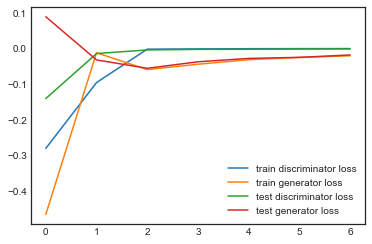

In [10]:
plot_losses(mnist_gan.train_history)

Epoch: 1


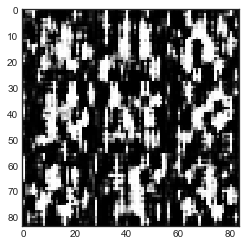

Epoch: 2


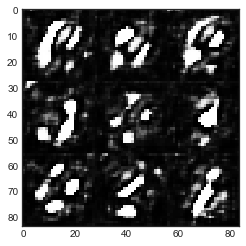

Epoch: 3


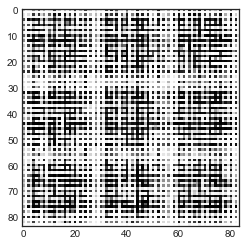

In [20]:
for i, fn in enumerate(sorted(glob('./images/mnist_w*'))):
    print('Epoch:', i + 1)
    img = Image.open(fn)
    plt.imshow(img, cmap='gray'); plt.show()

In [11]:
radar_gan = GAN(image_size=32, exp_id='radar1')

In [12]:
radar_gan.load_data('radar', normalize=True, halve_radar=True)

Number of radar stamps: 5682
Train samples: 4546 Test samples: 1136


In [13]:
radar_gan.create_generator(filters=[128, 64], first_conv_size=8, final_activation='sigmoid',
                           activation='LeakyReLU', bn=True)

/home/s/S.Rasp/.conda/envs/cbrain_gpu/lib/python3.6/site-packages/keras/activations.py:103: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  ).format(identifier=identifier.__class__.__name__))


In [14]:
radar_gan.create_discriminator(filters=[64, 128], strides=[2, 2], activation='LeakyReLU', 
                               bn=True)

/home/s/S.Rasp/.conda/envs/cbrain_gpu/lib/python3.6/site-packages/keras/activations.py:103: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  ).format(identifier=identifier.__class__.__name__))


In [15]:
radar_gan.compile()

In [16]:
radar_gan.G.summary()
radar_gan.D.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 8192)              827392    
_________________________________________________________________
batch_normalization_5 (Batch (None, 8192)              32768     
_________________________________________________________________
reshape_2 (Reshape)          (None, 8, 8, 128)         0         
_________________________________________________________________
up_sampling2d_3 (UpSampling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 128)       409728    
_________________________________________________________________
batch_normalization_6 (Batch (None, 16, 16, 128)       512       
__________

In [29]:
radar_gan.train(10, 100, train_D_separately=True)


 18%|█▊        | 79/450 [00:20<01:32,  4.02it/s, train_discriminator_loss=0.814, train_generator_loss=0.892, test_discriminator_loss=0.7, test_generator_loss=0.82]


 28%|██▊       | 126/450 [00:33<01:23,  3.89it/s, train_discriminator_loss=0.795, train_generator_loss=0.879, test_discriminator_loss=0.693, test_generator_loss=0.767]


 38%|███▊      | 173/450 [00:46<01:09,  3.97it/s, train_discriminator_loss=0.794, train_generator_loss=0.881, test_discriminator_loss=0.71, test_generator_loss=0.802]


 49%|████▉     | 220/450 [00:58<00:53,  4.32it/s, train_discriminator_loss=0.79, train_generator_loss=0.862, test_discriminator_loss=0.695, test_generator_loss=0.777]


 59%|█████▉    | 266/450 [01:10<00:42,  4.32it/s, train_discriminator_loss=0.778, train_generator_loss=0.852, test_discriminator_loss=0.712, test_generator_loss=0.681]


 69%|██████▉   | 312/450 [01:22<00:31,  4.33it/s, train_discriminator_loss=0.761, train_generator_loss=0.851, test_discriminator_loss=0.698, test_generator_loss=0.841]


 80%|███████▉  | 359/450 [01:35<00:22,  4.00it/s, train_discriminator_loss=0.78, train_generator_loss=0.831, test_discriminator_loss=0.7, test_generator_loss=0.78]


 90%|█████████ | 405/450 [01:48<00:11,  3.97it/s, train_discriminator_loss=0.765, train_generator_loss=0.822, test_discriminator_loss=0.699, test_generator_loss=0.824]


100%|██████████| 450/450 [02:02<00:00,  4.01it/s, train_discriminator_loss=0.752, train_generator_loss=0.867, test_discriminator_loss=0.695, test_generator_loss=0.767]


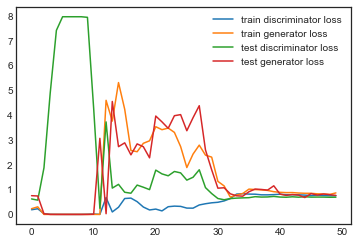

In [30]:
plot_losses(radar_gan.train_history)

Epoch: 1


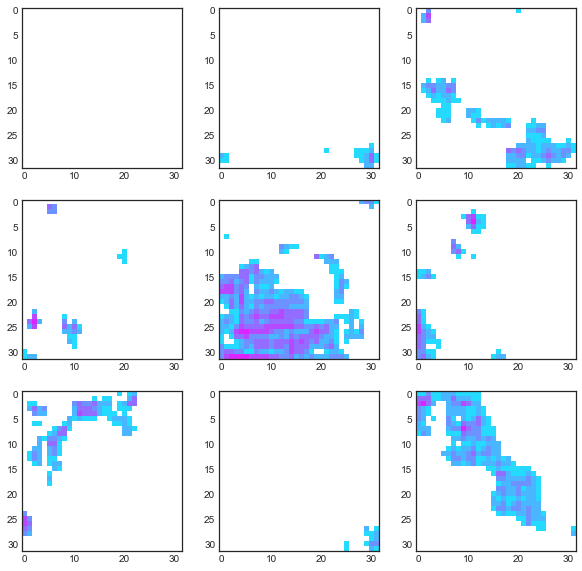

Epoch: 2


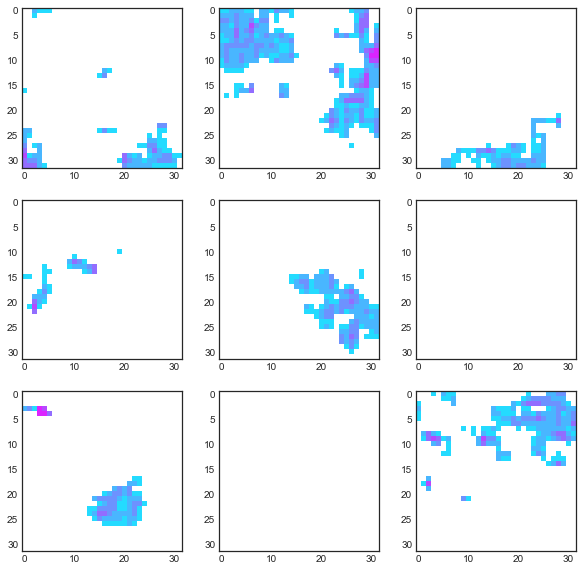

Epoch: 3


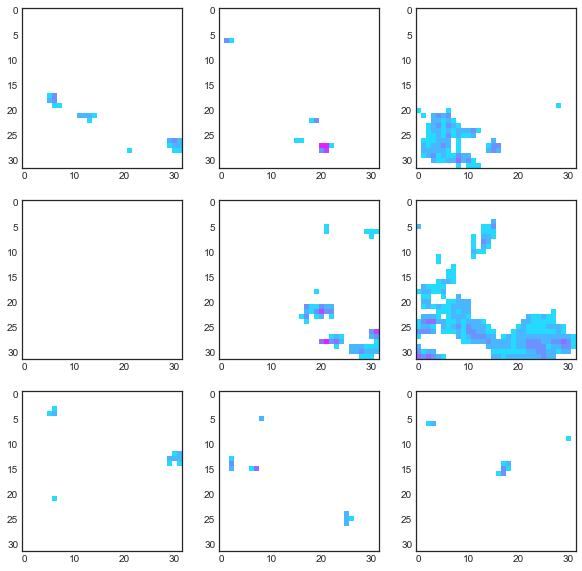

Epoch: 4


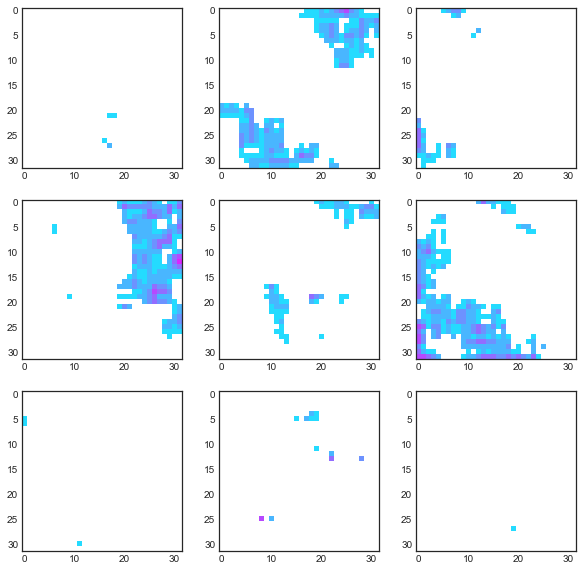

Epoch: 5


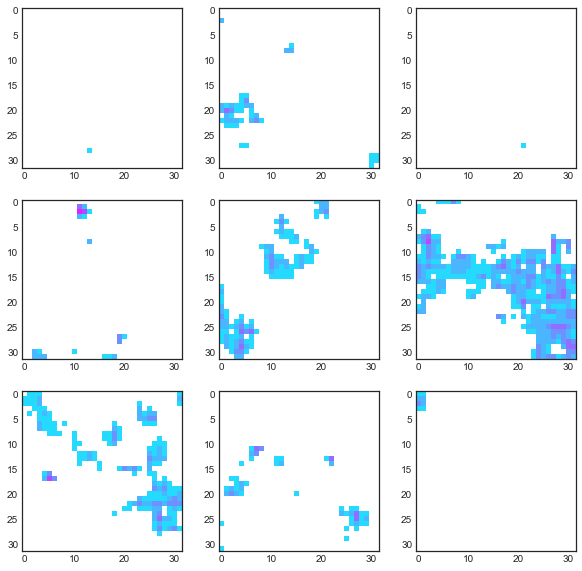

Epoch: 6


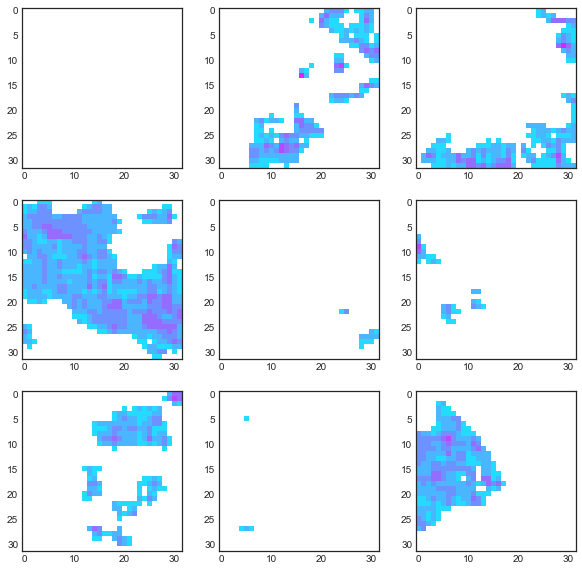

Epoch: 7


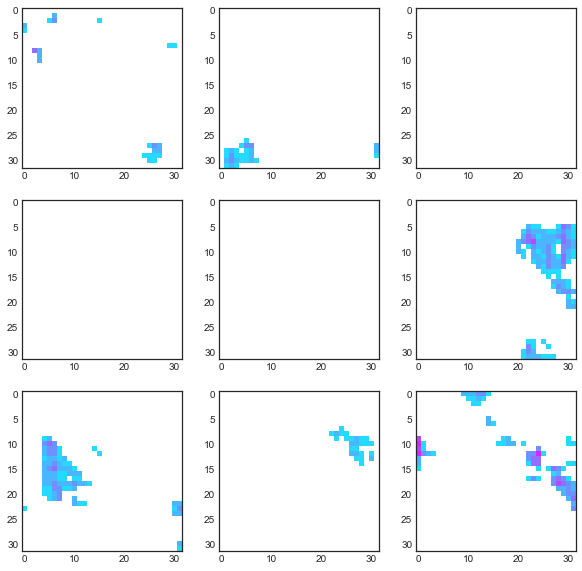

Epoch: 8


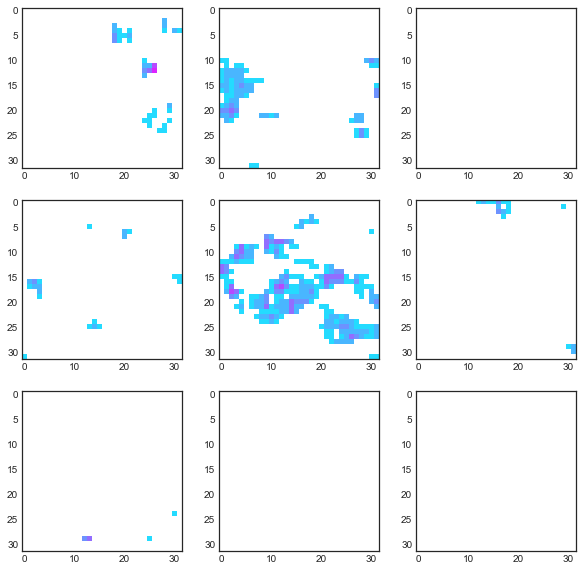

Epoch: 9


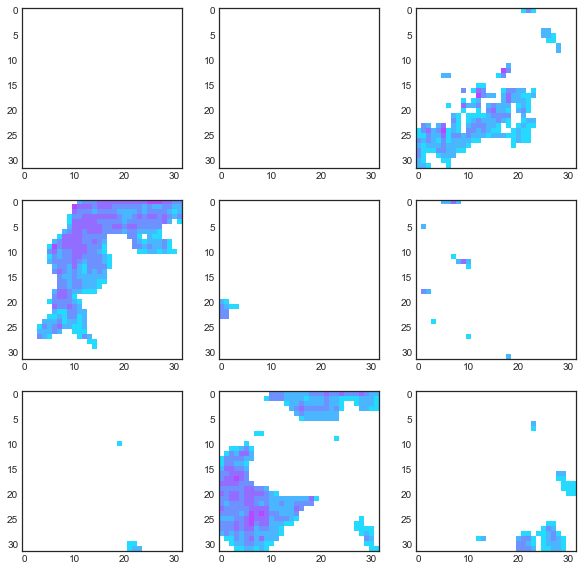

Epoch: 10


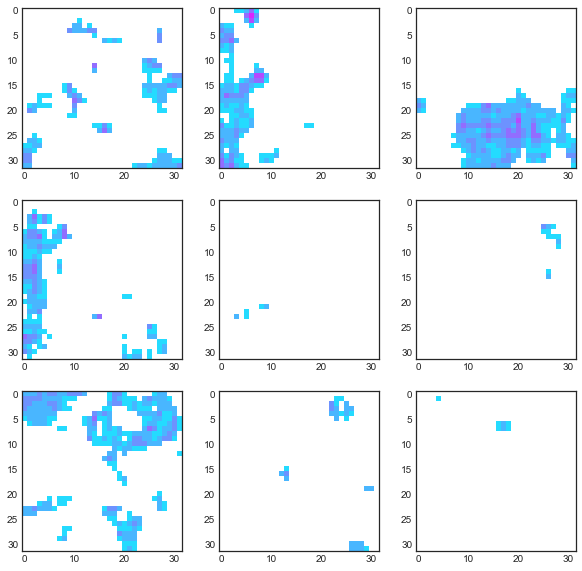

In [31]:
for i, fn in enumerate(sorted(glob('./images/radar1*.npy'))[-10:]):
    print('Epoch:', i + 1)
    plot_stamps(np.squeeze(np.load(fn)), normalize=True)

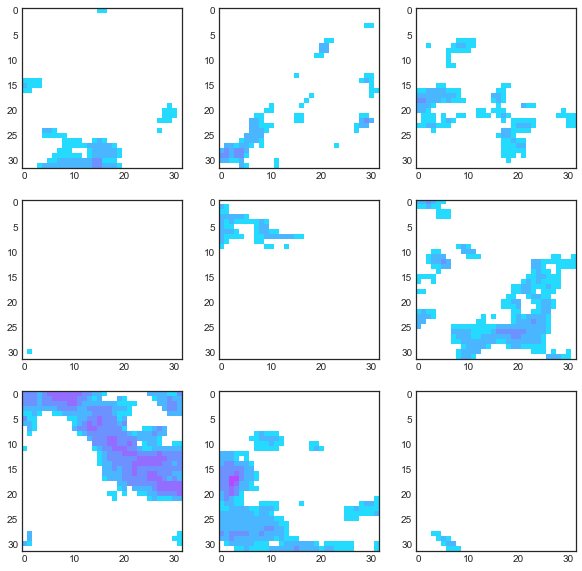

In [32]:
plot_stamps(np.squeeze(radar_gan.X_test), normalize=True)

In [33]:
radar_wgan = GAN(image_size=32, exp_id='radar2', wasserstein=True)

In [34]:
radar_wgan.load_data('radar', normalize=True, halve_radar=True)

Number of radar stamps: 5682
Train samples: 4546 Test samples: 1136


In [35]:
radar_wgan.create_generator(filters=[128, 64], first_conv_size=8, final_activation='sigmoid',
                           activation='LeakyReLU', bn=True)

/home/s/S.Rasp/.conda/envs/cbrain_gpu/lib/python3.6/site-packages/keras/activations.py:103: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  ).format(identifier=identifier.__class__.__name__))


In [36]:
radar_wgan.create_discriminator(filters=[64, 128], strides=[2, 2], activation='LeakyReLU', 
                               bn=True, final_activation='linear')

/home/s/S.Rasp/.conda/envs/cbrain_gpu/lib/python3.6/site-packages/keras/activations.py:103: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  ).format(identifier=identifier.__class__.__name__))


In [37]:
radar_wgan.compile()

In [ ]:
radar_wgan.train(50, 100, train_D_separately=True)


  3%|▎         | 77/2250 [00:49<24:22,  1.49it/s, train_discriminator_loss=-0.0511, train_generator_loss=0.112, test_discriminator_loss=-0.0609, test_generator_loss=0.0986]


  5%|▌         | 122/2250 [01:19<22:40,  1.56it/s, train_discriminator_loss=-0.0483, train_generator_loss=0.107, test_discriminator_loss=-0.0604, test_generator_loss=0.0874]


  7%|▋         | 167/2250 [01:56<20:04,  1.73it/s, train_discriminator_loss=-0.0447, train_generator_loss=0.102, test_discriminator_loss=-0.0673, test_generator_loss=0.0792]


  9%|▉         | 212/2250 [02:21<16:35,  2.05it/s, train_discriminator_loss=-0.0412, train_generator_loss=0.0962, test_discriminator_loss=-0.0495, test_generator_loss=0.0723]


 11%|█▏        | 257/2250 [02:45<17:04,  1.95it/s, train_discriminator_loss=-0.04, train_generator_loss=0.0897, test_discriminator_loss=-0.0541, test_generator_loss=0.0714]


 13%|█▎        | 283/2250 [02:59<17:02,  1.92it/s, train_discriminator_loss=-0.0377, train_generator_loss=0.0852, test_discriminator_loss=-0.0482, test_generator_loss=0.0415]

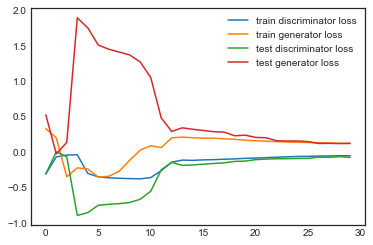

In [43]:
plot_losses(radar_wgan.train_history)

Epoch: 1


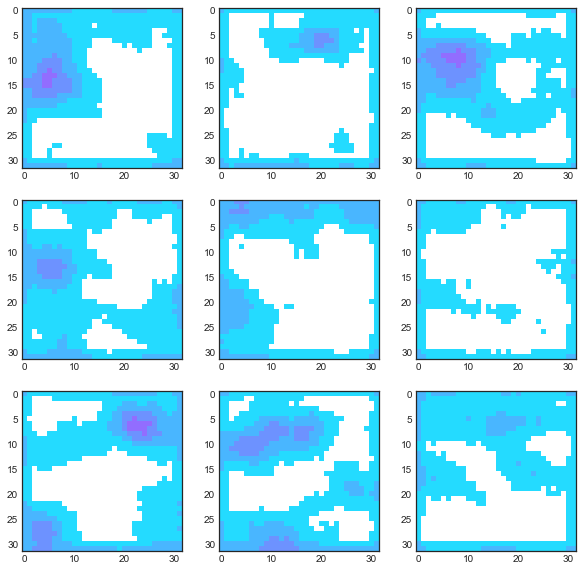

Epoch: 2


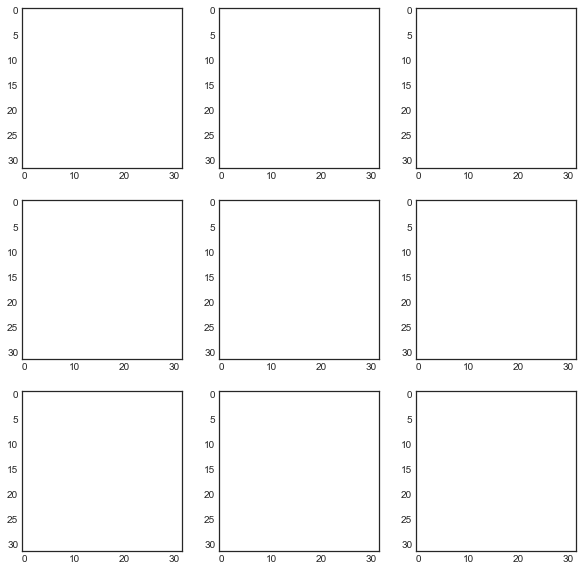

Epoch: 3


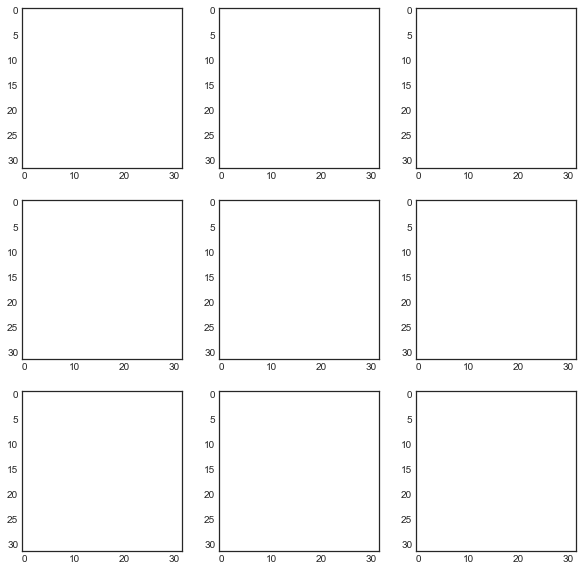

Epoch: 4


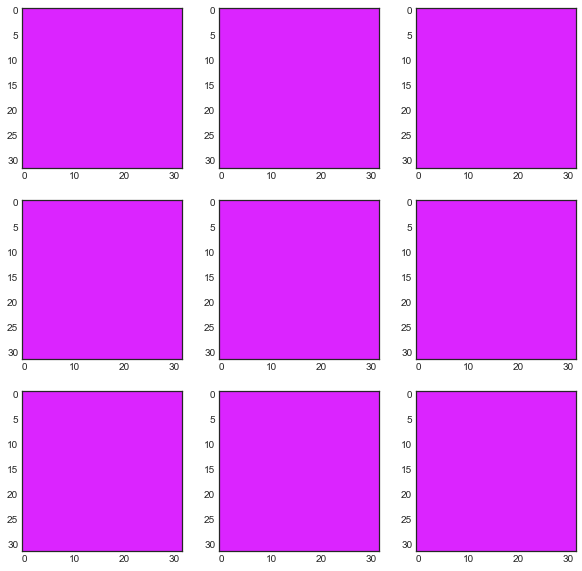

Epoch: 5


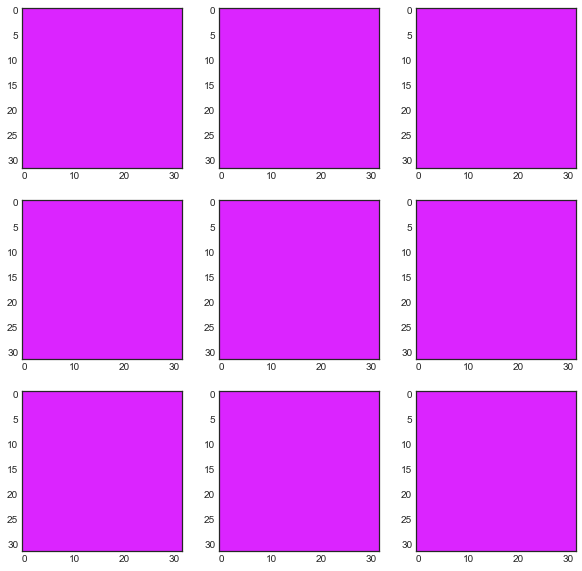

Epoch: 6


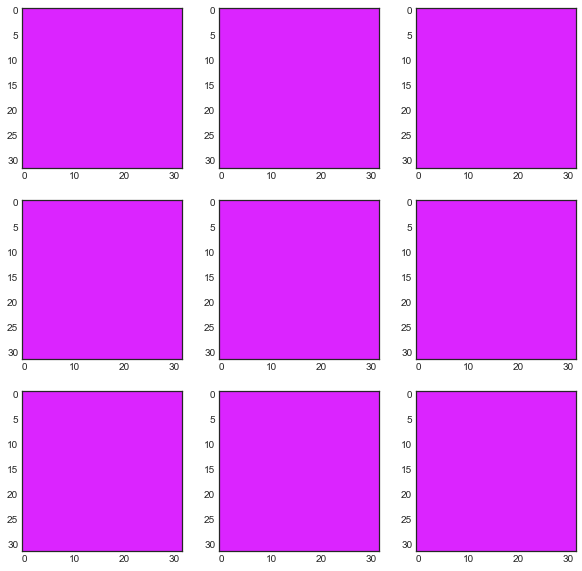

Epoch: 7


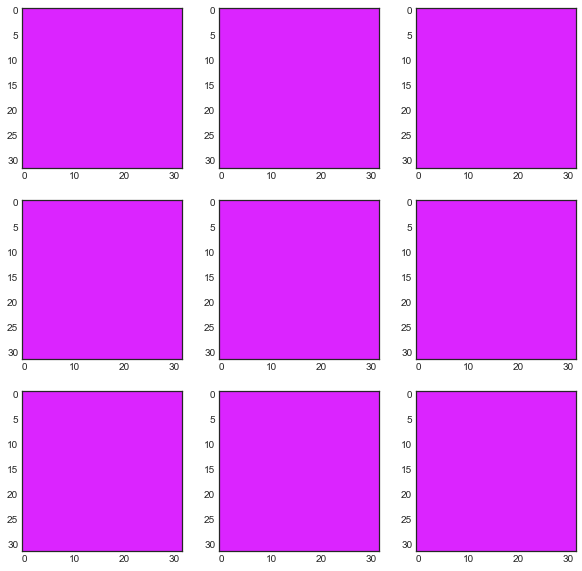

Epoch: 8


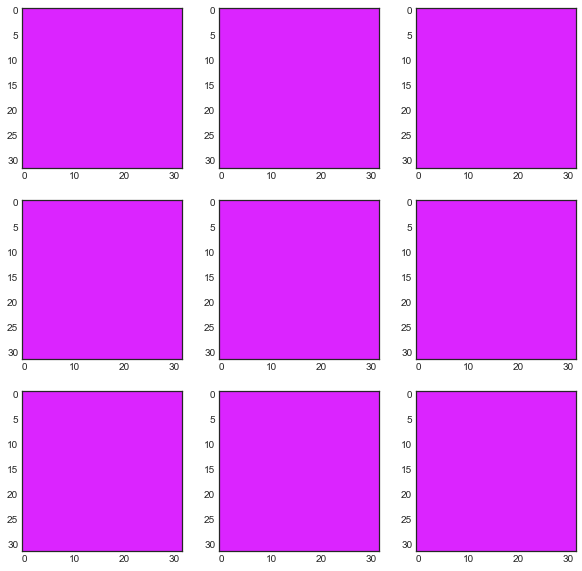

Epoch: 9


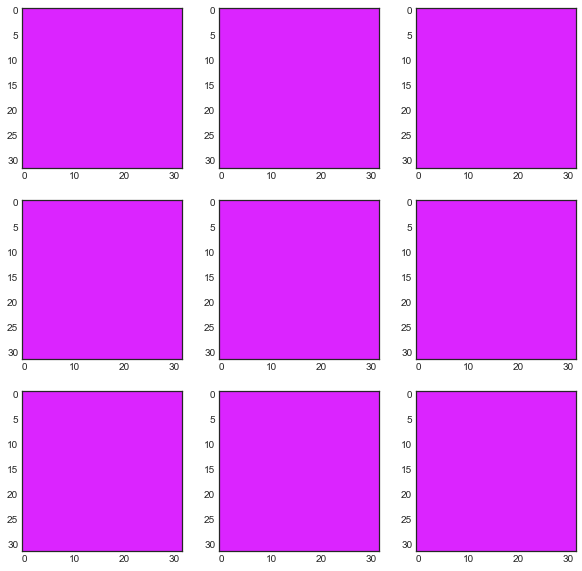

Epoch: 10


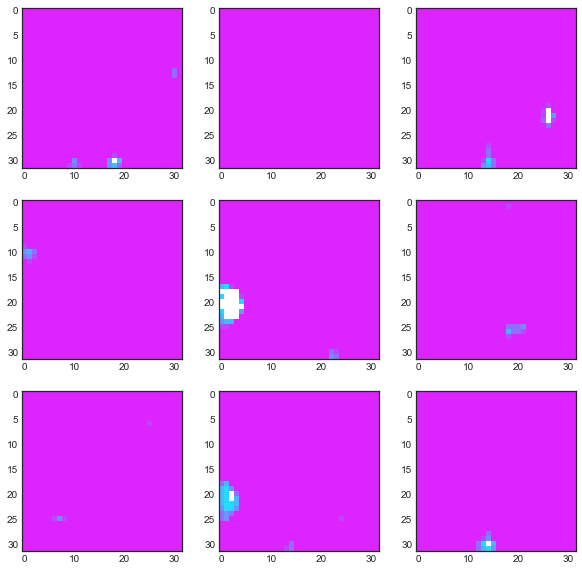

In [41]:
for i, fn in enumerate(sorted(glob('./images/radar2*.npy'))[-10:]):
    print('Epoch:', i + 1)
    plot_stamps(np.squeeze(np.load(fn)), normalize=True)

## Old

In [198]:
G = create_generator(filters=[128, 128, 64], first_conv_size=8, final_activation='sigmoid',
                    final_bias=False)
G.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_72 (InputLayer)        (None, 100)               0         
_________________________________________________________________
dense_50 (Dense)             (None, 8192)              827392    
_________________________________________________________________
reshape_25 (Reshape)         (None, 8, 8, 128)         0         
_________________________________________________________________
up_sampling2d_62 (UpSampling (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_144 (Conv2D)          (None, 16, 16, 128)       409728    
_________________________________________________________________
up_sampling2d_63 (UpSampling (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_145 (Conv2D)          (None, 32, 32, 128)       409728    
__________

/home/s/S.Rasp/repositories/radar-gan/models/models.py:53: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1, 2, padding="same", activation="sigmoid", use_bias=False)`
  bias=final_bias)(x)


In [199]:
D = create_discriminator(filters=[128, 128, 64, 64], strides=[2, 2, 2, 2], image_size=64, 
                         activation='LeakyReLU', dr=0.2)
D.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_73 (InputLayer)        (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_148 (Conv2D)          (None, 32, 32, 128)       3328      
_________________________________________________________________
dropout_23 (Dropout)         (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_149 (Conv2D)          (None, 16, 16, 128)       409728    
_________________________________________________________________
dropout_24 (Dropout)         (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_150 (Conv2D)          (None, 8, 8, 64)          204864    
_________________________________________________________________
dropout_25 (Dropout)         (None, 8, 8, 64)          0         
__________

/home/s/S.Rasp/.conda/envs/cbrain_gpu/lib/python3.6/site-packages/keras/activations.py:103: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  ).format(identifier=identifier.__class__.__name__))


In [200]:
C = compile_and_create_combined(G, D)

In [201]:
C.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_74 (InputLayer)        (None, 100)               0         
_________________________________________________________________
model_72 (Model)             (None, 64, 64, 1)         1851968   
_________________________________________________________________
model_73 (Model)             (None, 1)                 721409    
Total params: 2,573,377
Trainable params: 1,851,968
Non-trainable params: 721,409
_________________________________________________________________


In [202]:
train_history = train(D, G, C, 8, 100, dataset='radar', normalize_radar=True)

  0%|          | 0/8 [00:00<?, ?it/s]

Number of radar stamps: 6505


100%|██████████| 8/8 [06:02<00:00, 45.26s/it]


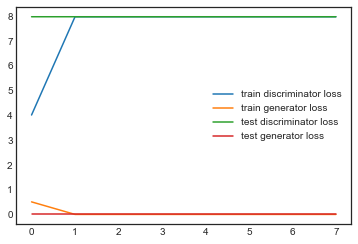

In [203]:
plot_losses(train_history)

Epoch: 1


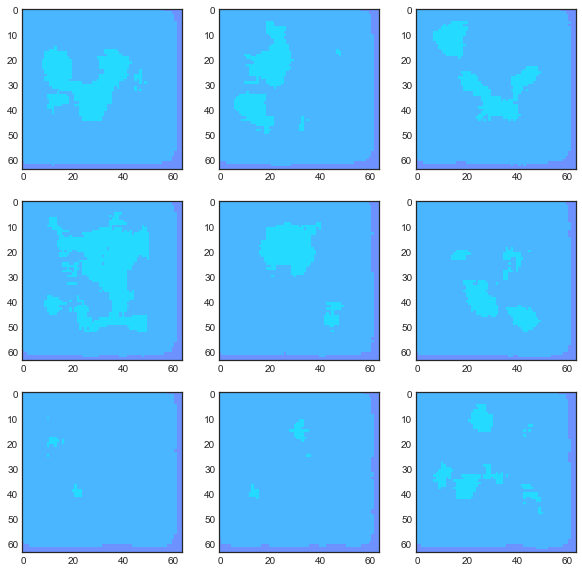

Epoch: 2


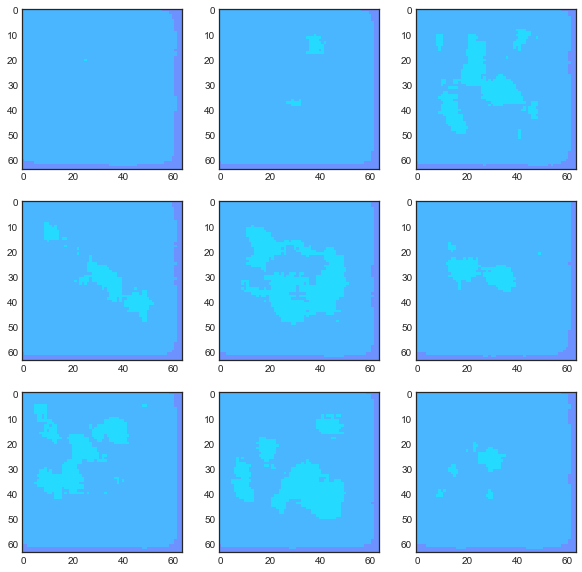

Epoch: 3


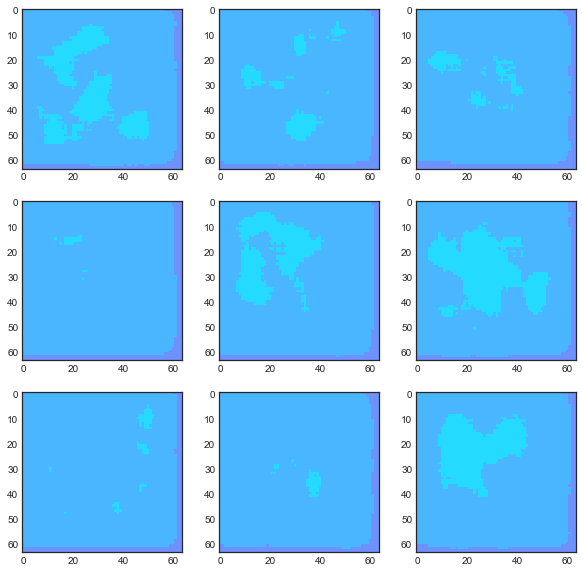

Epoch: 4


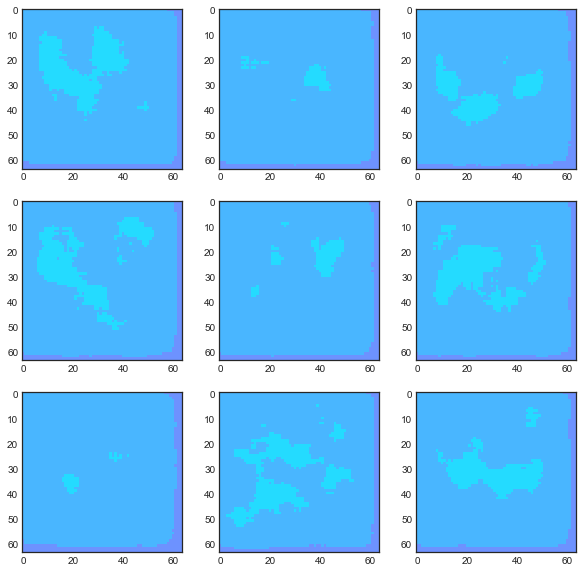

Epoch: 5


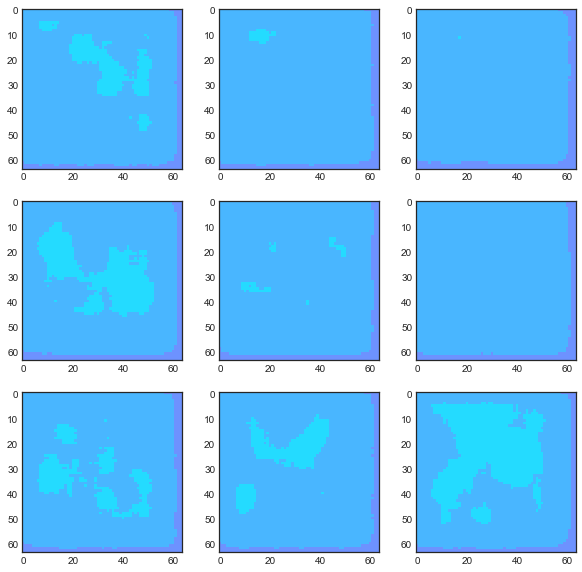

Epoch: 6


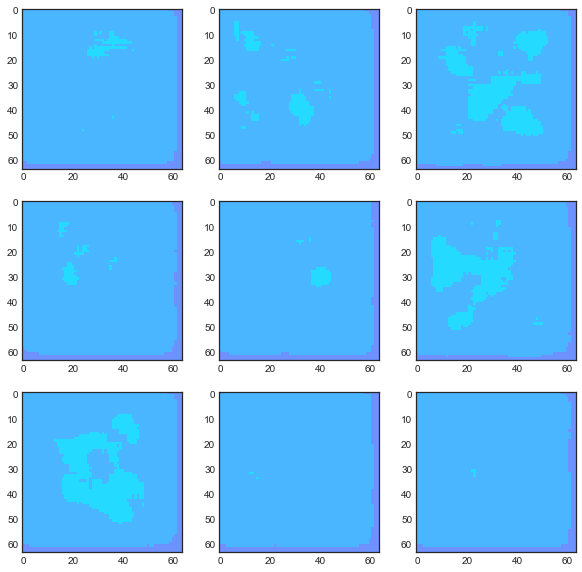

Epoch: 7


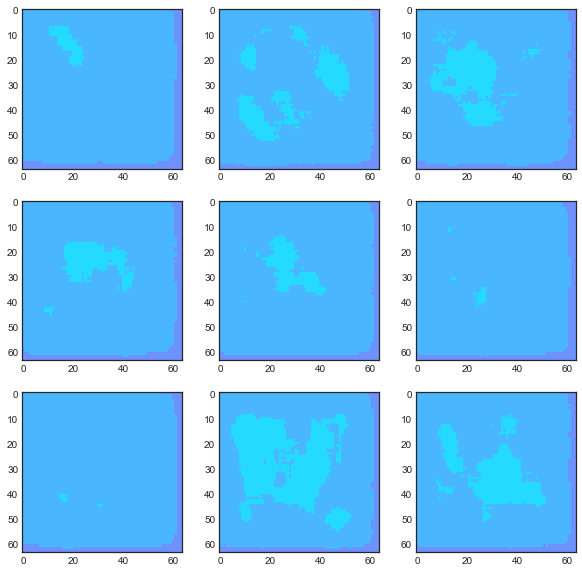

Epoch: 8


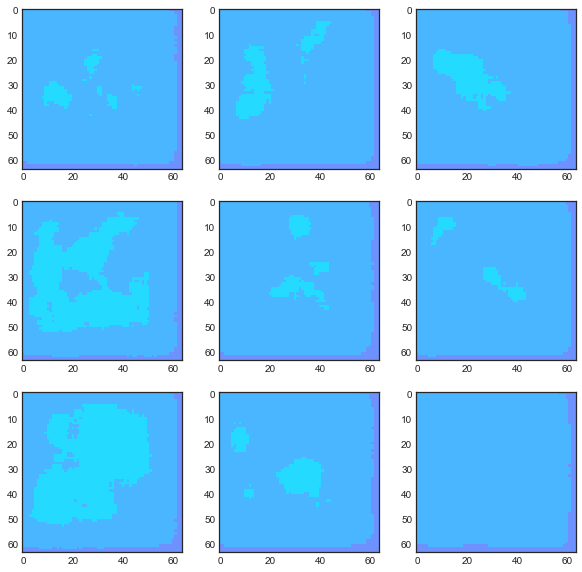

Epoch: 9


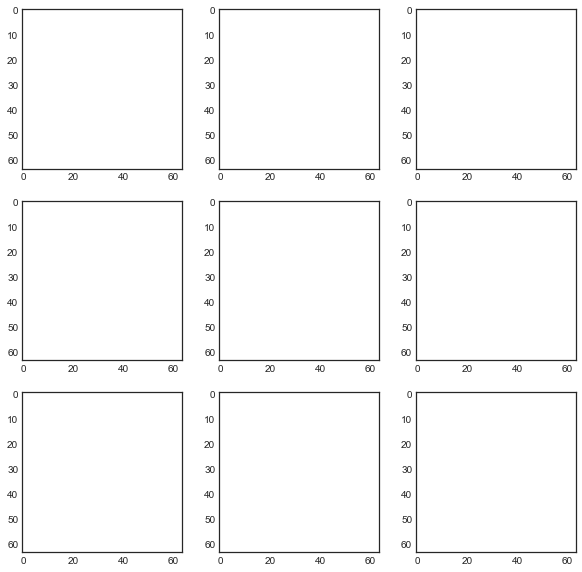

Epoch: 10


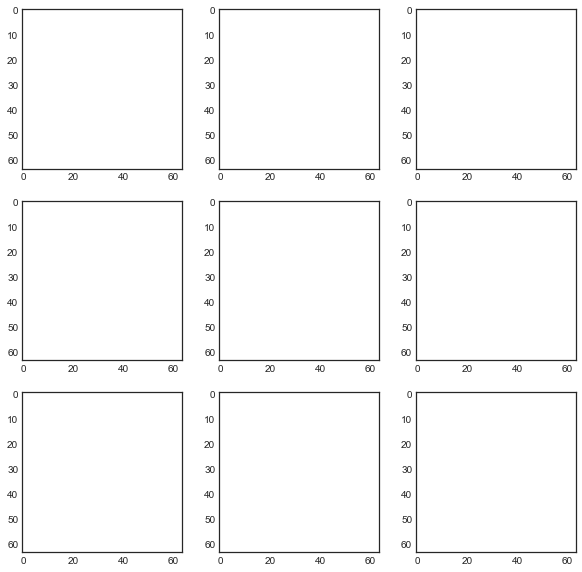

In [204]:
for i, fn in enumerate(sorted(glob('./images/*.npy'))):
    print('Epoch:', i + 1)
    plot_stamps(np.squeeze(np.load(fn)), normalize=True)

In [207]:
real = get_data('radar', normalize=True)

Number of radar stamps: 6505


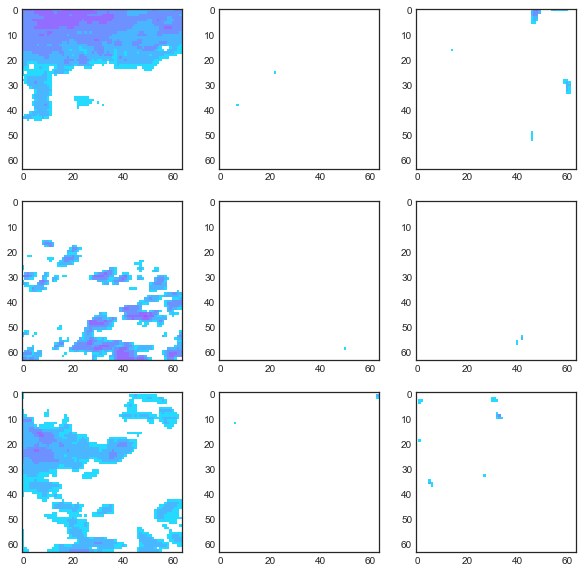

In [208]:
plot_stamps(np.squeeze(real[0][0]), normalize=True)

In [205]:
a = np.squeeze(np.load(sorted(glob('./images/*.npy'))[0]))

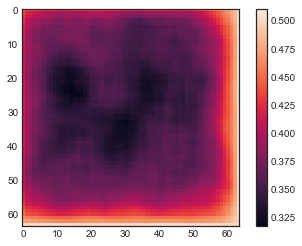

In [206]:
plt.imshow(a[0]);
plt.colorbar()

Epoch: 1


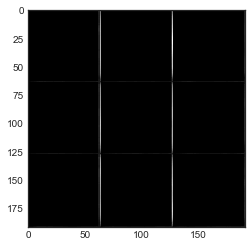

Epoch: 2


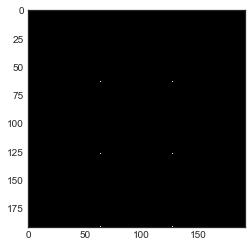

In [116]:
for i, fn in enumerate(sorted(glob('./images/*'))):
    print('Epoch:', i + 1)
    img = Image.open(fn)
    plt.imshow(img, cmap='gray'); plt.show()